In [1]:
import bezmerizing

In [2]:
import random

In [3]:
from flat import document, shape, rgb, rgba

In [4]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [5]:
import numpy as np

In [6]:
from numpy.random import uniform, normal, choice

In [7]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

In [10]:
from bezmerizing import Polyline

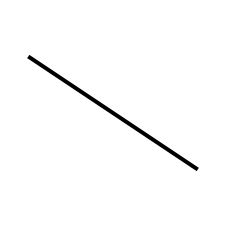

In [8]:
d = document(80, 80, 'mm')
page = d.addpage()
brush = shape().stroke(rgb(0, 0, 0)).width(4)
line_obj = brush.line(10, 20, 70, 60)
page.place(line_obj)
show(page)

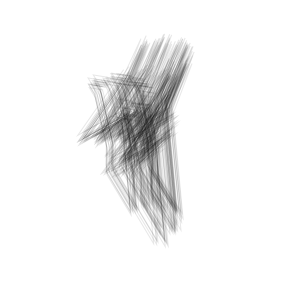

In [11]:
# generate polyline
pts = []
for i in range(12):
    pts.append([normal(), normal()])
pline = Polyline(pts)

# draw polyline many times on top of itself
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 24)).width(1)
for i in range(100):
    # add a bit of noise to the coordinates on each loop
    pline.vertices += np.random.randn(2) * 0.1
    lines = figure.polyline(pline.scale(10).translate(50, 50))
    page.place(lines)
show(page)

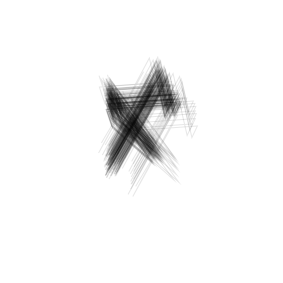

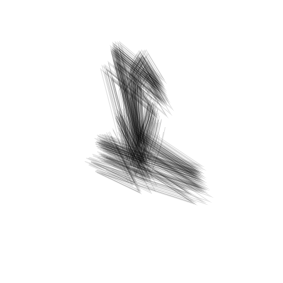

In [21]:
# generate polyline
pts = []
for i in range(12):
    pts.append([normal(), normal()])
pline = Polyline(pts)

# draw polyline many times on top of itself
d = document(100, 100, 'mm')
page = d.addpage()
figure = shape().stroke(rgba(0, 0, 0, 24)).width(1)
for i in range(100):
    # add a bit of noise to the coordinates on each loop
    pline.vertices += np.random.randn(2) * 0.1
    lines = figure.polyline(pline.scale(10).translate(50, 50))
    page.place(lines)
show(page)

# generate polyline
pts2 = []
for i in range(12):
    pts2.append([normal(), normal()])
pline2 = Polyline(pts2)

# draw polyline many times on top of itself
doc2 = document(100, 100, 'mm')
page2 = doc2.addpage()
figure2 = shape().stroke(rgba(0, 0, 0, 24)).width(1)
for i in range(100):
    # add a bit of noise to the coordinates on each loop
    pline2.vertices += np.random.randn(2) * 0.1
    lines2 = figure2.polyline(pline2.scale(10).translate(50, 50))
    page2.place(lines2)
show(page2)

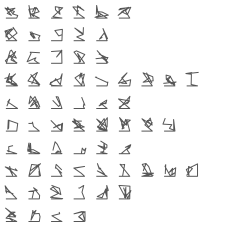

In [23]:
def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    rand_pline = Polyline(pts)
    return rand_pline

width = 80
height = 80
d = document(width, height, 'mm')
page = d.addpage()
brush = shape().nofill().stroke(rgba(40, 40, 40, 200)).width(1).join('round')
grid_size = 10
# size of a single rectangle in the grid
cell_size_x = width / grid_size
cell_size_y = height / grid_size
for j in range(grid_size):
    for i in range(random.randrange(4, grid_size)):
        scale_val = (width / grid_size) * 0.6
        x = i * cell_size_x + (cell_size_x * 0.5) # add 1/2 cell size to offset glyph center
        y = j * cell_size_y + (cell_size_y * 0.5)
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        glyph = glyph.scale(scale_val).translate(x, y)
        page.place(brush.polyline(glyph))
show(page)

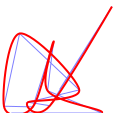

In [27]:
pline = uniform_glyph_baseline().scale(40).translate(20, 20)
d = document(40, 40, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 0, 255, 128)).width(1)
curve_figure = shape().stroke(rgba(255, 0, 0, 255)).width(2)
page.place(line_figure.polyline(pline))
page.place(curve_figure.path(pline.smooth_path()))
show(page)

In [ ]:
def make_scribble(width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return Polyline(pts)

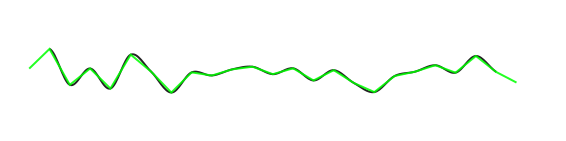

In [29]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()
line_figure = shape().stroke(rgba(0, 255, 0, 220)).width(2)
curve_figure = shape().stroke(rgba(0, 0, 0, 220)).width(2)
scribble_poly = make_scribble(width=180,
                    height=5,
                    steps=25,
                    stddev=0)
lines = line_figure.polyline(scribble_poly.translate(10, 25))
curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 25))
page.place(curve) # comment to hide curves
page.place(lines) # comment to hide non-smooth lines
show(page)

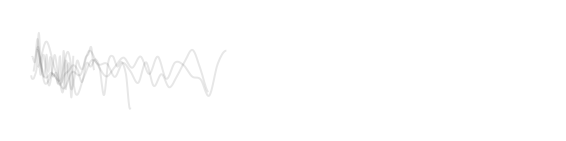

In [40]:
size = 200
d = document(200, 50, 'mm')
page = d.addpage()

multilines = []

for i in range(5):
    curve_figure = shape().stroke(rgba(0, 0, 0, 24)).width(2)
    scribble_poly = make_scribble(width=random.randrange(100),
                    height=5,
                    steps=25,
                    stddev=0)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, 25))
#     multilines.append(curve)
    page.place(curve)

# page.place(multilines) # comment to hide curves
show(page)

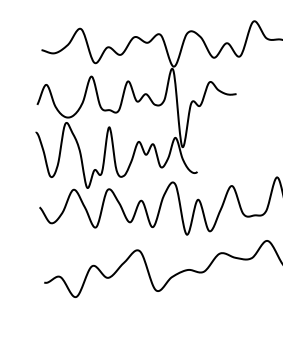

In [65]:
size = 200
d = document(100, 125, 'mm')
page = d.addpage()

for i in range(5):
    curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
    scribble_poly = make_scribble(width=random.randrange(50, 150),
                    height=5,
                    steps=25,
                    stddev=0)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, (100*(i+.75)/5)))
    page.place(curve)

show(page)

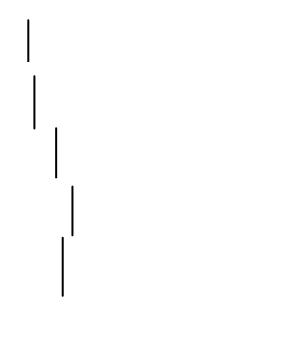

In [73]:
size = 200
d = document(100, 125, 'mm')
page = d.addpage()

for i in range(5):
    curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
    pts = []
    width = random.randrange(50, 150)
    height = 5
    steps = 25
    stddev = 0
    for f in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    scribble_poly = Polyline(pts)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, (100*(i+.75)/5)))
    page.place(curve)

show(page)

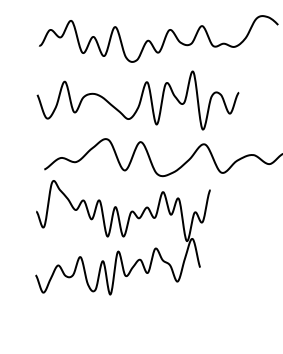

In [74]:
size = 200
d = document(100, 125, 'mm')
page = d.addpage()

for i in range(5):
    curve_figure = shape().stroke(rgba(0, 0, 0, 255)).width(2)
    pts = []
    width = random.randrange(50, 150)
    height = 5
    steps = 25
    stddev = 0
    for f in range(steps):
        x = ((width / steps) * f) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    scribble_poly = Polyline(pts)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, (100*(i+.75)/5)))
    page.place(curve)

show(page)

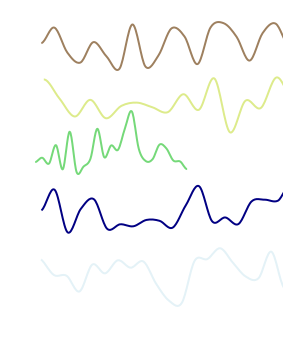

In [75]:
size = 200
d = document(100, 125, 'mm')
page = d.addpage()

for i in range(5):
    curve_figure = shape().stroke(rgba(random.randrange(0, 255), random.randrange(0, 255), random.randrange(0, 255), 255)).width(2)
    pts = []
    width = random.randrange(50, 150)
    height = 5
    steps = 25
    stddev = 0
    for f in range(steps):
        x = ((width / steps) * f) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    scribble_poly = Polyline(pts)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, (100*(i+.75)/5)))
    page.place(curve)

show(page)

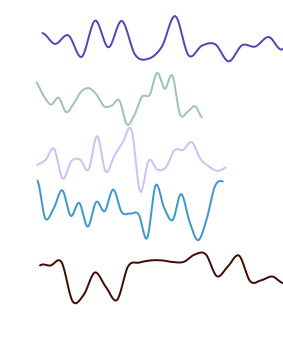

In [76]:
size = 200
d = document(100, 125, 'mm')
page = d.addpage()

for i in range(5):
    curve_figure = shape().stroke(rgba(random.randrange(0, 255), random.randrange(0, 255), random.randrange(0, 255), 255)).width(2)
    pts = []
    width = random.randrange(50, 150)
    height = 5
    steps = 25
    stddev = 0
    for f in range(steps):
        x = ((width / steps) * f) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    scribble_poly = Polyline(pts)
    curve = curve_figure.path(scribble_poly.smooth_path().translate(10, (100*(i+.75)/5)))
    page.place(curve)

show(page)